# Final Report: Child Food Insecurity Predictions

In [3]:
"""
Code taken from:
https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
"""

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Introduction

Food insecurity is a huge problem for the United States. More than 1 in 7 families experienced food insecurity at some point in 2012 (Hunger in America). Children who facing hunger are more likely to struggle in school, experience developmental impairments, and have more social and behavior problems (Feeding America). Some studies have also shown that child food insecurity and paradoxically lead to child obesity (Olson). However, there are many resources available to help combat food insecurities. There are food banks, meal programs, and grocery programs. For children specifically, there are school breakfast, lunch, and snack programs in place across the country.

## What is food insecurity?
Food-insecurity
Prevalence of household-level food insecurity by State. Food-insecure households were unable, at times during the year, to provide adequate food for one or more household members because the household lacked money and other resources for food.

Data sources: ERS estimates using 3 years of data from the Current Population Survey Food Security Supplement, as reported in Table 5 in the referenced report, Household Food Security in the United States in 2015 (September 2016). The food security survey asks one adult respondent in each household a series of questions about experiences and behaviors that indicate food insecurity. The food security status of the household was assessed based on the number of food-insecure conditions reported (such as being unable to afford balanced meals, cutting the size of meals because of too little money for food, or being hungry because of too little money for food). Note: margins of error are substantial for some States; comparisons between States should take into consideration margins of error published in the source report.

## Data Exploration

To begin exploring our data we looked at income and poverty rates. We believed these would be the biggest predictors of food insecurity. Below are histograms of median income and poverty rates. The average median income in this dataset is about $48,600. The average poverty rate is about 16%.

The graph on the right plots these two measurements against each other. Clearly there is a correlation between median household income, and poverty rate. Though this information did not surprise us.

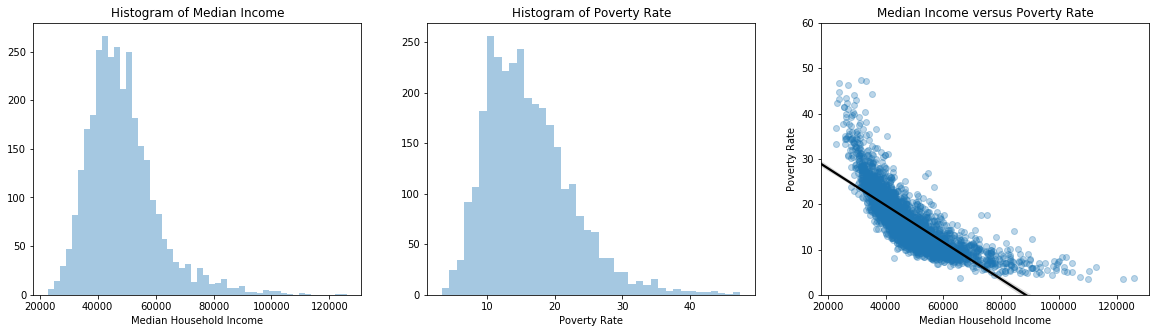

In [3]:
from data_exploration import plot_adult_food_insec, plot_child_food_insec, plot_income
plot_income()

Next we began to look at things we suspected would affect food insecurity and child food insecurity. Below are plots of median household income, poverty rate, and percent white population against adult food insecurity. Although our project mainly looks at child food insecurity, we were curious to see if there would be differences. 

We found that there is a negative correlation between median household income and adult food insecurity, and a positive correlation for poverty rate. 

The plot on the right shows the percentage of the population that's white versus the food insecurity rating. There does seem to be some correlation, but the most noticable feature of this graph is how there is more of a spread of data the less the percentage is. That spread wasn't consistent when plotting child food insecurity.

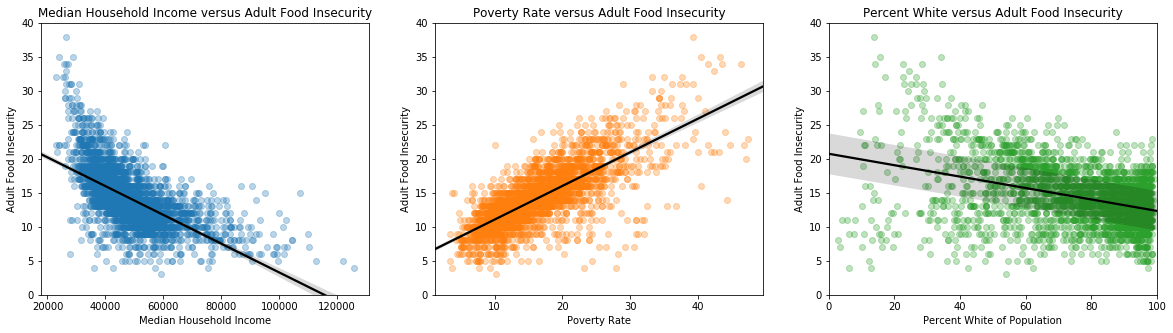

In [4]:
plot_adult_food_insec()

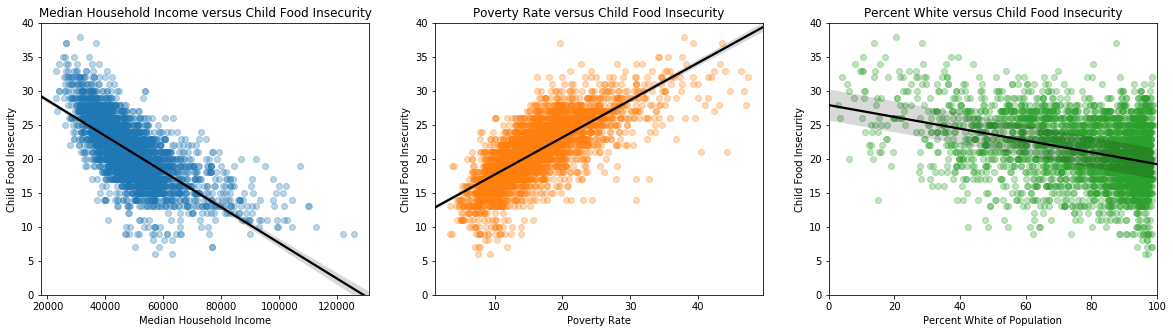

In [5]:
plot_child_food_insec()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
import geopandas
import shapely
import plotly
plotly.tools.set_credentials_file(username='kateks', api_key='QEzAmEwn2ElqLstgdBVi')
data = pd.read_csv("data/prepped/compiled_data.csv")


colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 25, len(colorscale) - 1))
fips = data['FIPS'].tolist()
values = data['Food_Insec_Children'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Child Food Insecurity',
    legend_title='Child Food Insecuirty %'
)
py.iplot(fig, filename='choropleth_full_usa')

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
pip install geopandas==0.3.0
pip install pyshp==1.2.10
pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
conda install plotly
conda install geopandas
```